Author : Nelson Vithayathil Varghese

This is the Machine Learning model implementation file for the 'Hollywood Blockbuster' case study . 


I would be adding the whole thought process that I have applied to approach this case and build the ML model below.  
As I always do for any ML case implementation, I have attempted to organize this implemenation as per the following checklist

*   Look at the big picture and frame the problem
*   Obtain the data
*   Discover and visualize the data to gain maximum initial insights
*   Prepare the data for ML model(ML algorithm)
*   Select the model and train it with the data
*   Fine tune and optimize the initial solution / base model

I will detail each of the above steps within the code

#Big Picture

ML model for the 'Hollywood Blockbuster' case study is fundementally a Supervised( Multi-class Classification),Batch Learning/offline learning,Model-based model.I believe that this is the basic statement that can embedd the core meaning of this model. To detail more on the nature of classification, this model is a multi-class classification model so that for any given  movie data instance ( feature vector) from the dataset  with it's attribute , the model should be able to predict the category into which it would belong. As per the case, we have 9 category values (labels / ground truth values) [1,2,3,4,5,6,7,8,9] into which the a movie could fall-into so that model prediction should fall into one among these values for a given instance

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Obtain the data

I have written a helper function which can be used from both colab / Jupyter notebook environment to fetch the data into a Pandas dataframe for further analysis

In [ ]:
# Helper funtion for reading the excel dataset file and generating the dataframe
def load_dataset(file_name):
    
    data_path = os.path.join(os.getcwd(),file_name)
#     return pd.read_excel(data_path,index_col = 0)
    return pd.read_excel(data_path)


In [ ]:
df_train_data = load_dataset('TrainingData.xlsx')
df_train_data.head(5)

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [ ]:
df_scoring_data = load_dataset('ScoringData.xlsx')
df_scoring_data.head(5)

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,7970115,"Avengers, The (2011)",Marvel's The Avengers,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide
1,174540115,Dark Knight Rises The,The Dark Knight Rises,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide
2,149080115,Bond 23,Skyfall,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide
3,136020115,Twilight Saga Breaking Dawn Part 2 The,"The Twilight Saga: Breaking Dawn, Part 2",136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide
4,53500115,"Hobbit, The",The Hobbit: An Unexpected Journey,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide


 # Explore both the Training and Scoring datasets

** Scoring data is analysed only for the basic numerical statistics, whereas Tarining data is explored extensively with diagrams**

**Discover the statistical (numerical aspects ) of the data**

In [ ]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  1196 non-null   int64 
 1   name                                1196 non-null   object
 2   display_name                        1196 non-null   object
 3   production_year                     1196 non-null   int64 
 4   movie_sequel                        1196 non-null   int64 
 5   creative_type                       1196 non-null   object
 6   source                              1196 non-null   object
 7   production_method                   1196 non-null   object
 8   genre                               1196 non-null   object
 9   language                            1196 non-null   object
 10  board_rating_reason                 1196 non-null   object
 11  movie_board_rating_display_name     1196 non-null   obje

In [ ]:
df_train_data.isnull().values.any()

False

It is a clean data file without any missing values

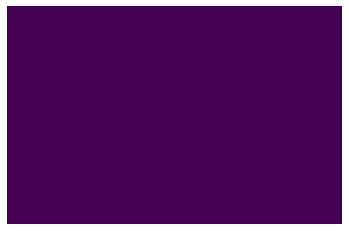

In [ ]:
# Visually check for any missing / null values
sns.heatmap(df_train_data.isnull(),xticklabels=False,yticklabels=False,cbar = False,cmap='viridis')

In [ ]:
# df_train_data['movie_sequel'].value_counts()
df_train_data['creative_type'].value_counts()

Contemporary Fiction       638
Fantasy                    131
Historical Fiction         100
Dramatization               95
Science Fiction             89
Factual                     60
Kids Fiction                59
Super Hero                  20
Multiple Creative Types      4
Name: creative_type, dtype: int64

In [ ]:
df_scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  91 non-null     int64 
 1   name                                91 non-null     object
 2   display_name                        91 non-null     object
 3   production_budget                   91 non-null     int64 
 4   production_year                     91 non-null     int64 
 5   movie_sequel                        91 non-null     int64 
 6   creative_type                       91 non-null     object
 7   source                              91 non-null     object
 8   production_method                   91 non-null     object
 9   genre                               91 non-null     object
 10  language                            91 non-null     object
 11  board_rating_reason                 91 non-null     object
 

In [ ]:
df_scoring_data.isnull().values.any()

False

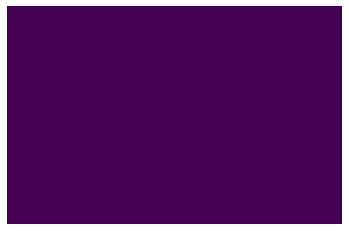

In [ ]:
sns.heatmap(df_scoring_data.isnull(),xticklabels=False,yticklabels=False,cbar = False,cmap='viridis')

In [ ]:
df_train_data.nunique()

id                                    1196
name                                  1196
display_name                          1195
production_year                          5
movie_sequel                             2
creative_type                            9
source                                  16
production_method                        6
genre                                   13
language                                16
board_rating_reason                   1003
movie_board_rating_display_name          6
movie_release_pattern_display_name       7
total                                  324
Category                                 9
dtype: int64

In [ ]:
df_scoring_data.nunique()

id                                    91
name                                  91
display_name                          91
production_budget                     26
production_year                        1
movie_sequel                           2
creative_type                          8
source                                10
production_method                      3
genre                                  9
language                               5
board_rating_reason                   79
movie_board_rating_display_name        5
movie_release_pattern_display_name     6
dtype: int64

Generally, I am more intersted in looking into the correlation matrix to get initial insights in terms the features that are having high correlation values with label as well as within features among. 

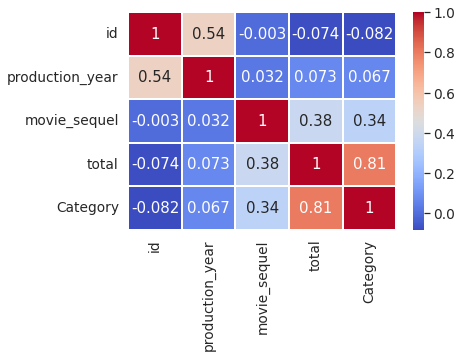

In [ ]:
# This coreration matrix gives coreration data for numerical feature values only 
sns.set(font_scale = 1.25)
sns.heatmap(df_train_data.corr(),cmap='coolwarm',annot=True,linewidths=1)

In [ ]:
# This function is written to get more intuitions on the correlation matrix for textual category features 
def generate_correlation_data(dataframe):
    correlation_matrix = dataframe.apply(lambda x :pd.factorize(x)[0])
    return correlation_matrix

In [ ]:
df_train_data_categories = df_train_data.drop(['id','production_year','movie_sequel','total'],axis=1)
generate_correlation_data(df_train_data_categories).head(5)

,name,display_name,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,Category
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,1,0,0,0
2,2,2,0,2,0,0,0,2,0,0,0
3,3,3,2,0,1,1,0,3,1,0,0
4,4,4,1,3,2,1,0,4,0,0,0


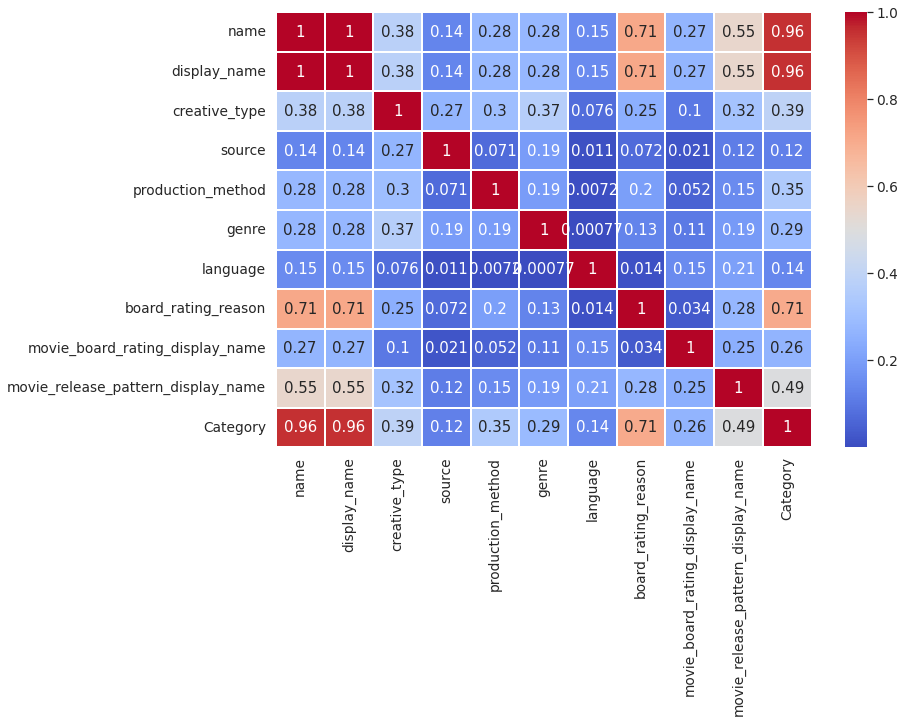

In [ ]:
plt.figure(figsize=(12,8))
plt.tight_layout()
sns.heatmap(generate_correlation_data(df_train_data_categories).corr(),cmap='coolwarm',annot=True,linewidths=1)

# Features that are highly correlated with label(Category)  
# - creative_type
# - production_method
# - genre
# - movie_board_rating_display_name
# - movie_release_pattern_display_name

#  Features that are relatively less correlated with label(Category)  

# - source
# - language


# Reason for high positive correlation for the features listed below with the label is due to :

# --- unique index code values returned by pd.factorize() 
# --- and it does not indicate any real high positive coreration with category

# - name
# - display_name
# - board_rating_reason


**Discover the data visually with Seaborn plots**

Text(0.5, 1.0, 'Count data for Category feature')

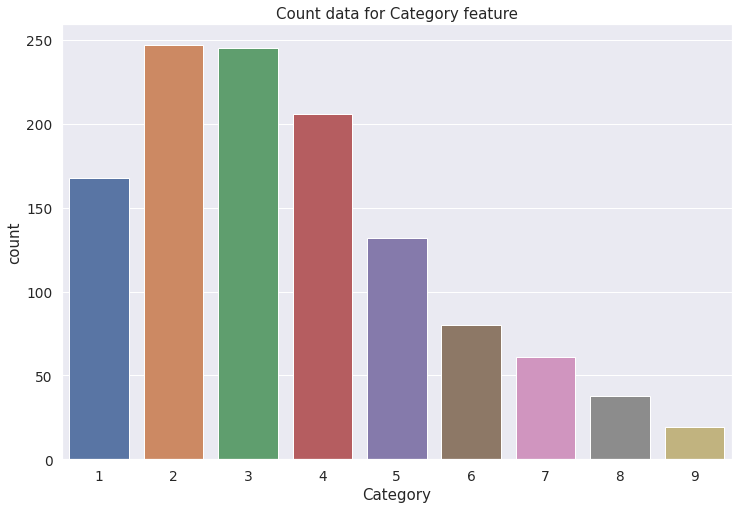

In [ ]:
plt.figure(figsize=(12,8))
# sns.set(font_scale = 1.25)
sns.countplot(x='Category', data=df_train_data)
plt.title('Count data for Category feature')

Text(0.5, 1.0, 'Count data for movie_board_rating_display_name feature')

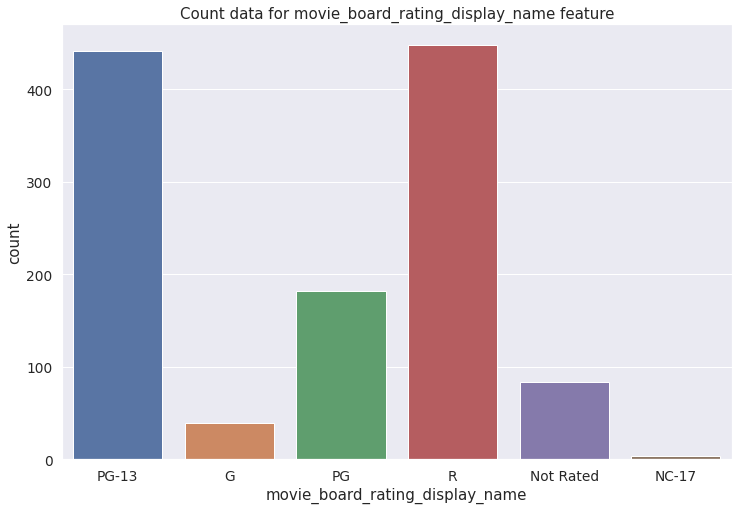

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='movie_board_rating_display_name', data=df_train_data)
plt.title('Count data for movie_board_rating_display_name feature')

Text(0.5, 1.0, 'Count data for movie_release_pattern_display_name feature')

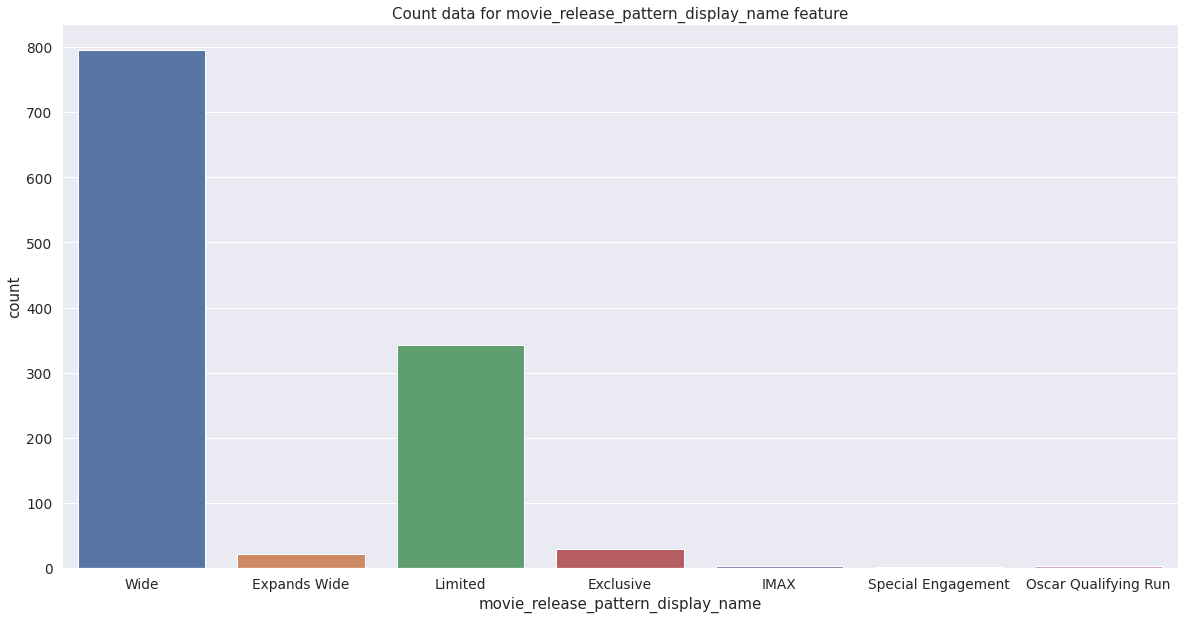

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='movie_release_pattern_display_name', data=df_train_data)
plt.title('Count data for movie_release_pattern_display_name feature')

Text(0.5, 1.0, 'Count data for language feature')

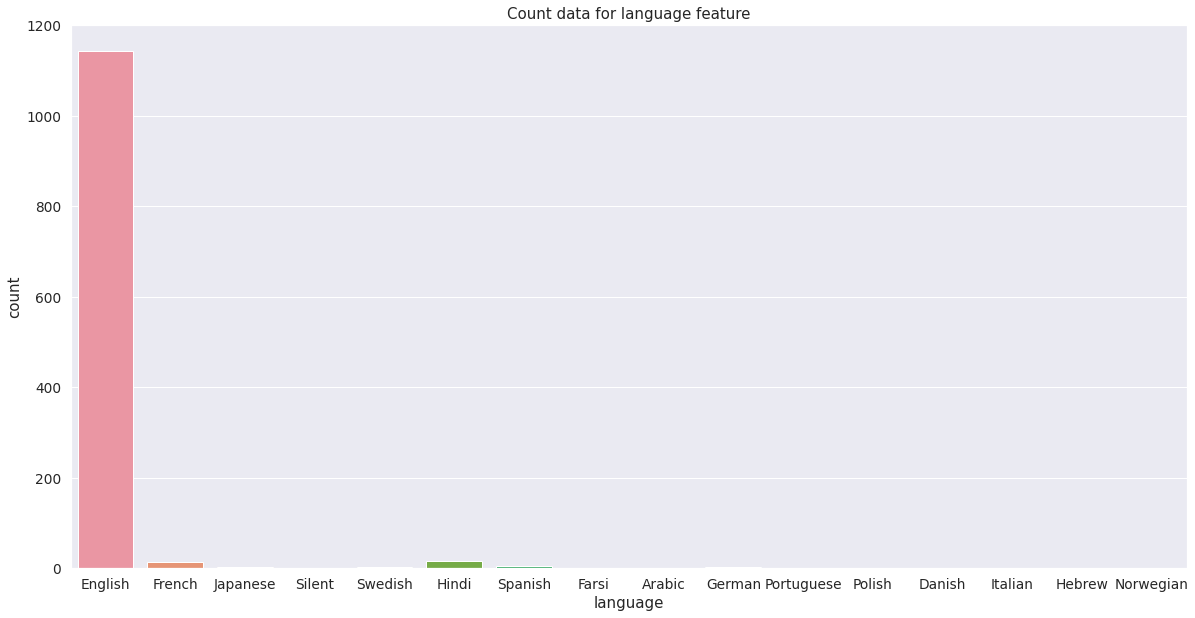

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='language', data=df_train_data)
plt.title('Count data for language feature')

Text(0.0, 1.0, 'Category Lable value vs Total Revenue')

<Figure size 720x864 with 0 Axes>

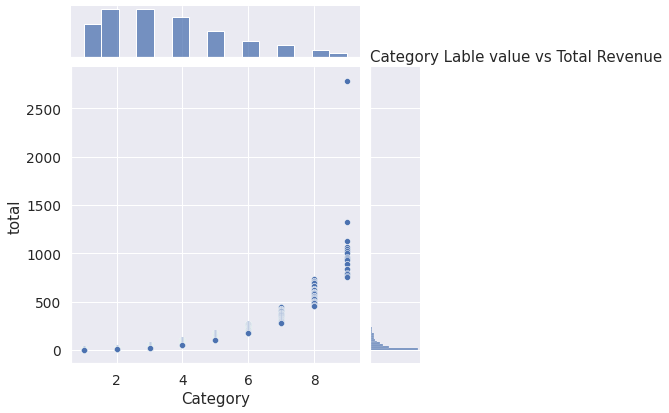

In [ ]:
# It is quite expected that movie data instances having high Category value generates high Total income
plt.figure(figsize=(10,12))
# sns.set_style()
sns.jointplot(x='Category', y='total', data=df_train_data)
plt.title('Category Lable value vs Total Revenue',loc='left')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total revenue')

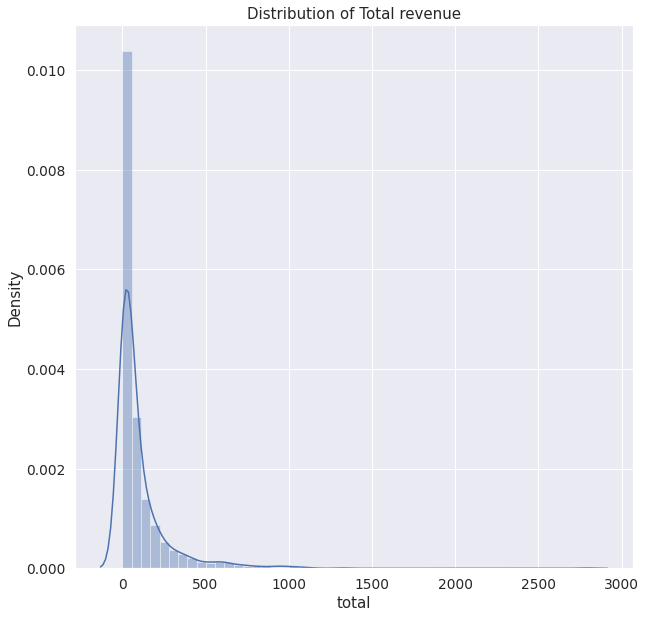

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df_train_data['total'],bins=50)
plt.title('Distribution of Total revenue')

Text(0.5, 1.0, 'Count data for movie_sequel attribute')

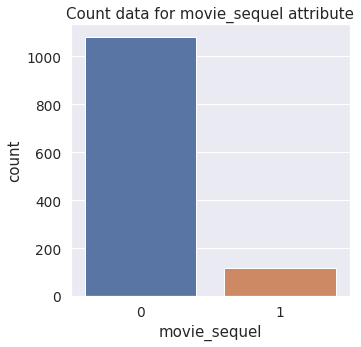

In [ ]:
# A negative coreraltion value for the movie_sequel is a bit surprsing to me and was curious to dig deep into that data   
plt.figure(figsize=(5,5))
sns.countplot(x='movie_sequel', data=df_train_data)
plt.title('Count data for movie_sequel attribute')

In [ ]:
# It clearly shows the imbalance in terms of the two different data values under movie_sequel feature
df_train_data['movie_sequel'].value_counts()

0    1079
1     117
Name: movie_sequel, dtype: int64

Text(0.5, 1.0, 'Distribution of movie_sequel feature across Category Label value')

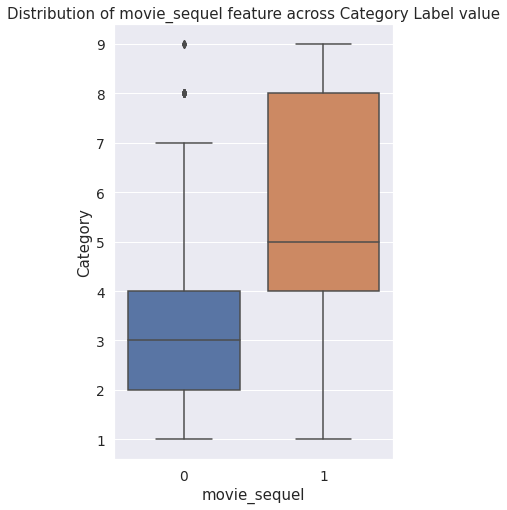

In [ ]:
# It is quite reasonable understand that sequel with value 1 generated more total revenue, except couple of outliers (value 0)
plt.figure(figsize=(5,8))
sns.boxplot(x='movie_sequel',y='Category', data= df_train_data)
plt.title('Distribution of movie_sequel feature across Category Label value')

Text(0.5, 1.0, 'Distribution of movie_sequel feature Vs Category Label value across genre feature')

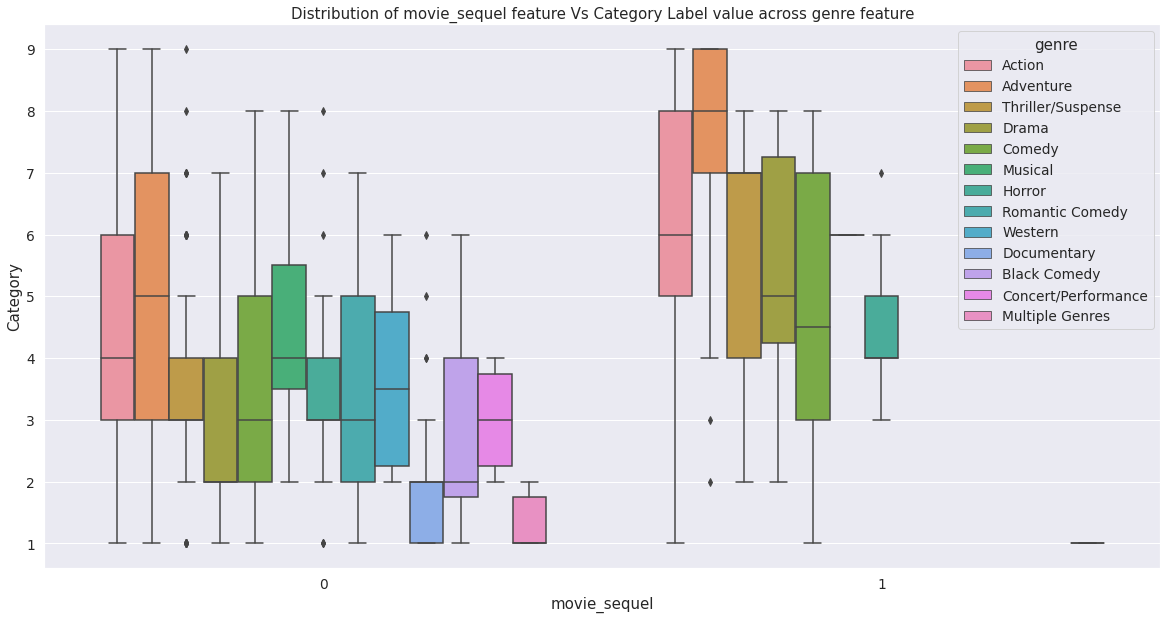

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='movie_sequel',y='Category', data= df_train_data,hue='genre')
plt.title('Distribution of movie_sequel feature Vs Category Label value across genre feature')

Exploring the highly positive coreralted features to draw more insights behind high correlations.

I personally like the box plots a lot !.

Text(0.5, 1.0, 'Distribution of creative_type feature across Category Label value')

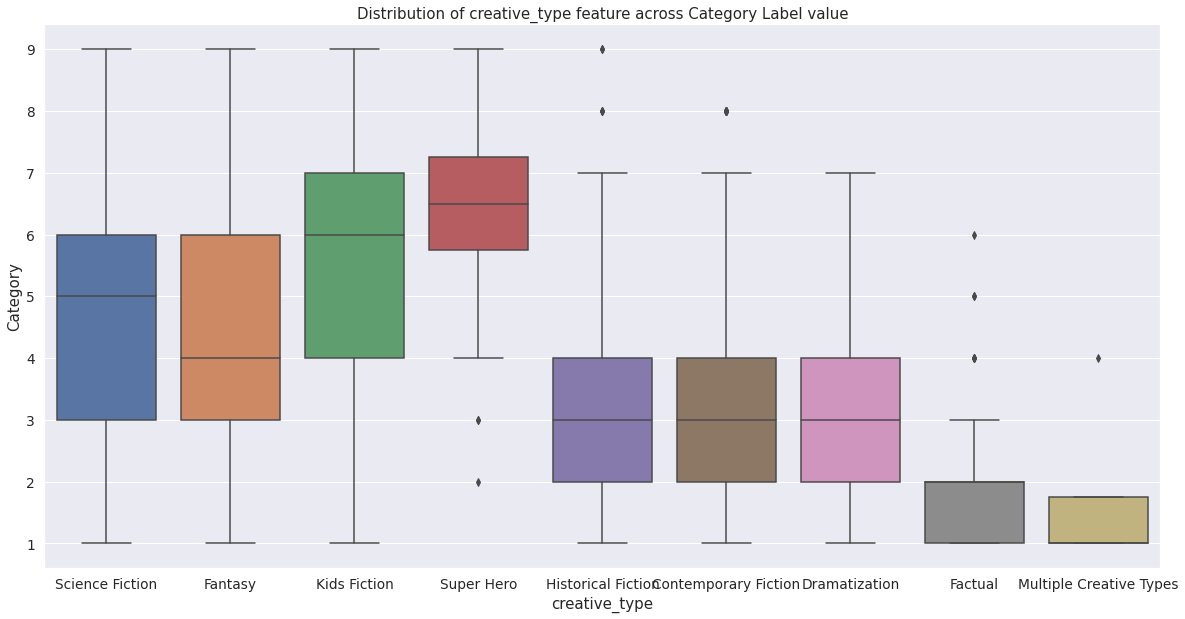

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='creative_type',y='Category', data= df_train_data)
plt.title('Distribution of creative_type feature across Category Label value')

Text(0.5, 1.0, 'Distribution of production_method feature across Category Label value')

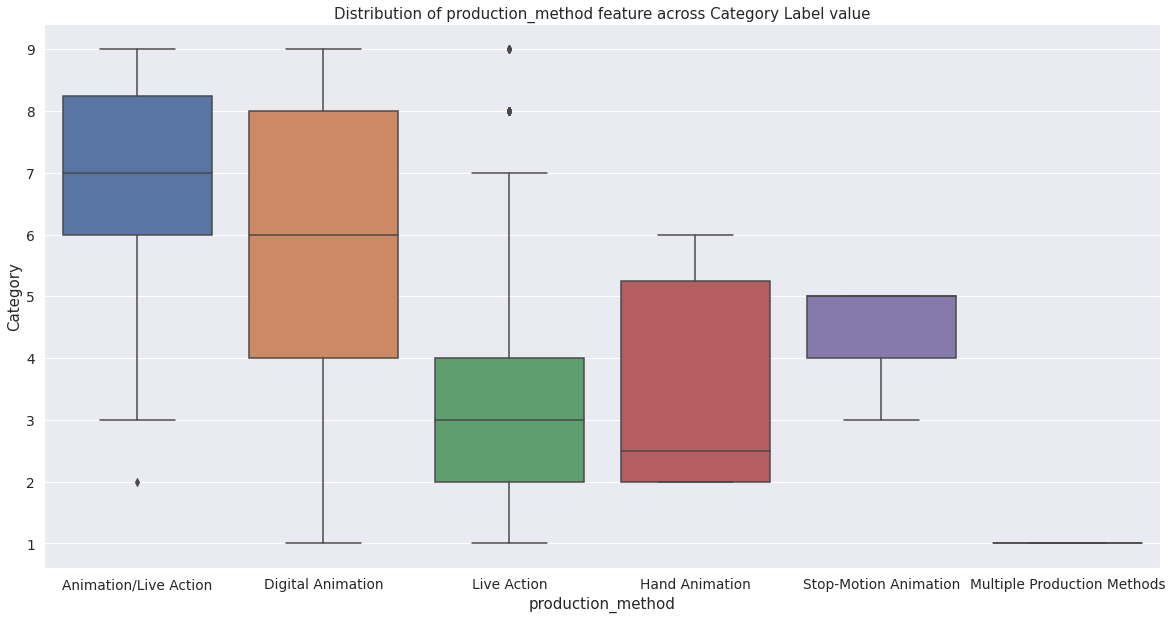

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='production_method',y='Category', data= df_train_data)
plt.title('Distribution of production_method feature across Category Label value')

Text(0.5, 1.0, 'Distribution of genre feature across Category Label value')

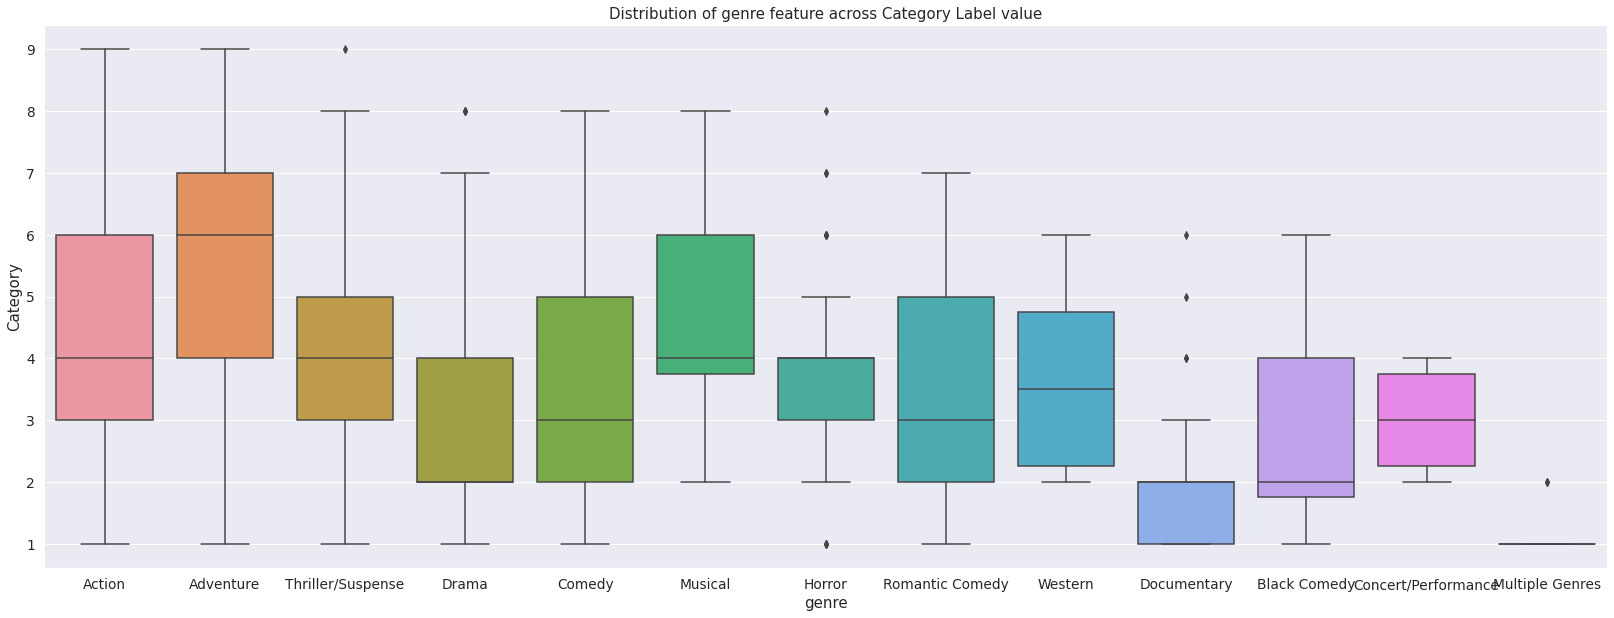

In [ ]:
plt.figure(figsize=(28,10))
sns.boxplot(x='genre',y='Category', data= df_train_data)
plt.title('Distribution of genre feature across Category Label value')

Text(0.5, 1.0, 'Distribution of movie_board_rating_display_name feature across Category Label value')

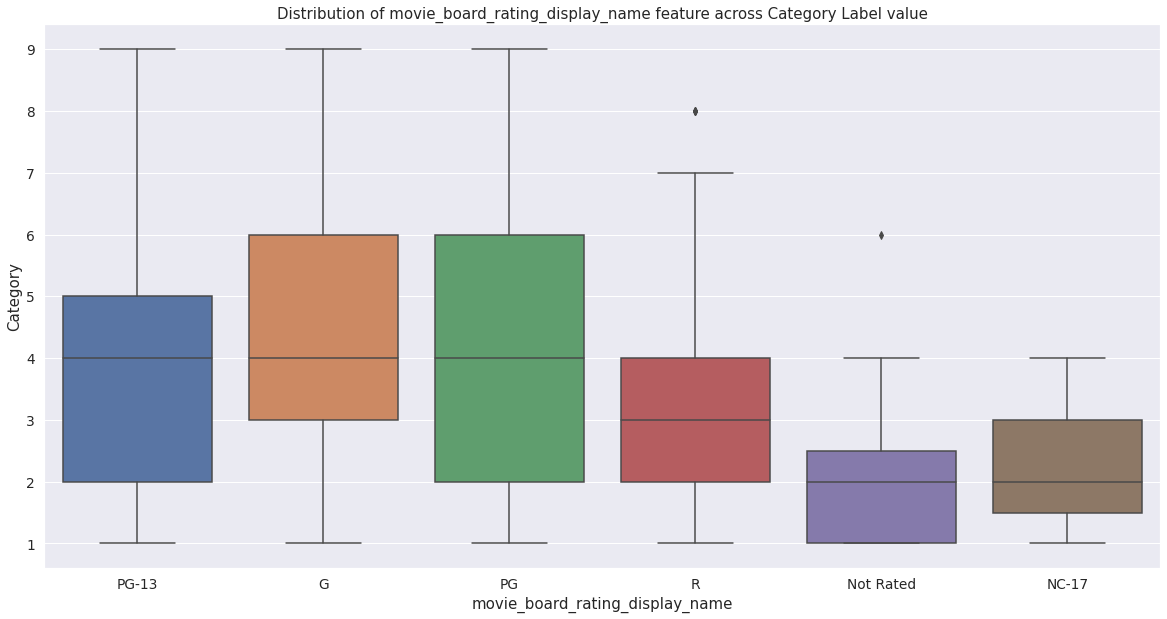

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='movie_board_rating_display_name',y='Category', data= df_train_data)
plt.title('Distribution of movie_board_rating_display_name feature across Category Label value')

Text(0.5, 1.0, 'Distribution of movie_release_pattern_display_name feature across Category Label value')

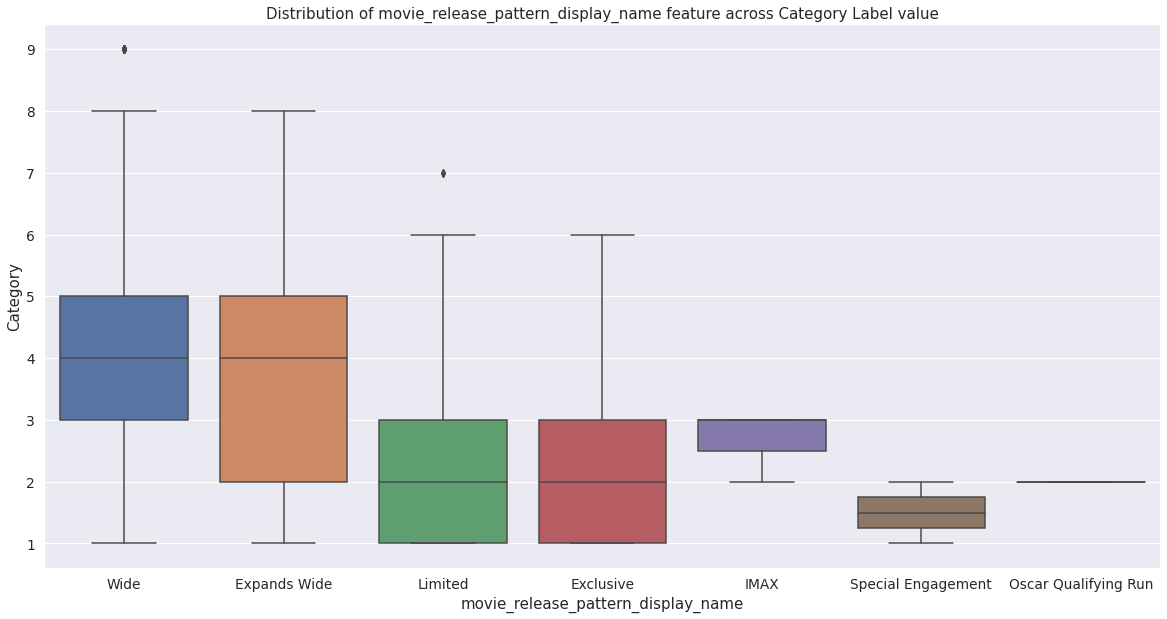

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='movie_release_pattern_display_name',y='Category', data= df_train_data)
plt.title('Distribution of movie_release_pattern_display_name feature across Category Label value')

Text(0.5, 1.0, 'Distribution of movie_board_rating_display_name feature across Category Label value')

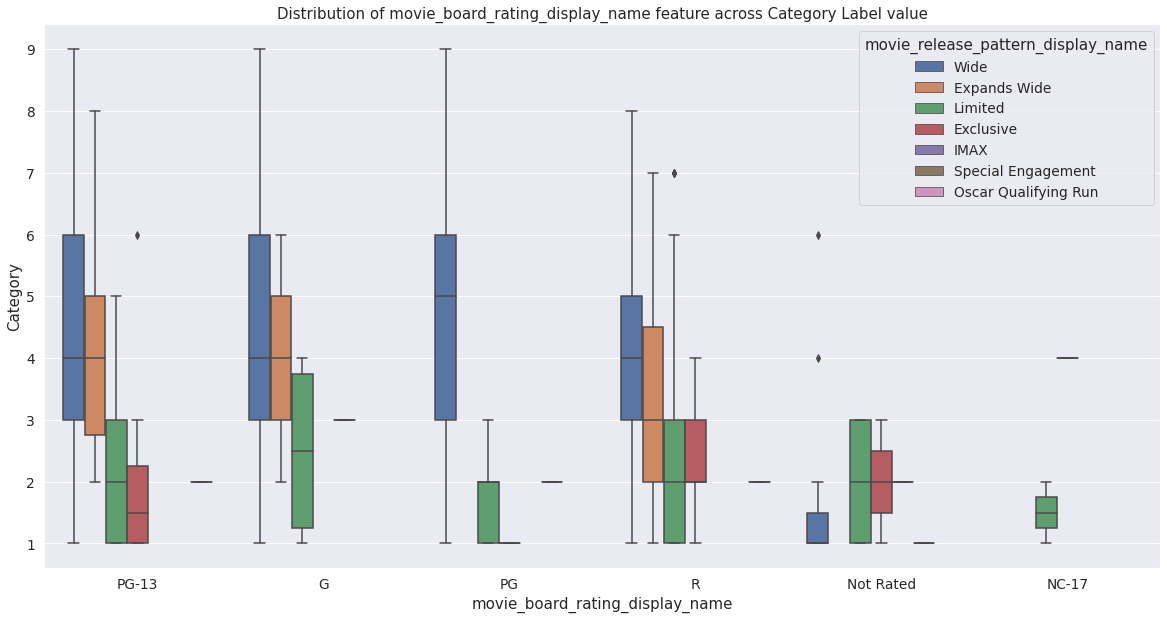

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='movie_board_rating_display_name',y='Category', data= df_train_data,hue='movie_release_pattern_display_name')
plt.title('Distribution of movie_board_rating_display_name feature across Category Label value')

#Prepare the data for Machine Learning Models

One of the features within the dataset by name 'board_rating_reason' is a text-rich data.My initial intuition was to drop this column as I had a thought that subsequent column(movie_board_rating_display_name)should be reflecting this information.Later I had another line of thought about the nature of sentiments hiding inside those reasons such that if I can manage to get those sentiments into a category type such as positive, neutral and negative, then it should be a more meaningful data

TextBlob is a python library used for Natural Language Processing (NLP).TextBlob returns polarity and subjectivity of a sentence. Polarity lies between
[-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.I decided to use the polarity part for deriving the sentiment insights. 

In [ ]:
import nltk

In [ ]:
from textblob import TextBlob

In [ ]:
# Helper function written for sentiment analysis and return the polarity
# This adds a category type feature named setiment_score into the data.
def sentiment_analysis(df_data,data_feature):
        
    def getSubjectivityValue(text):
        return TextBlob(text).sentiment.subjectivity

     #Create a function to get the polarity
    def getPolarityValue(text):
        return TextBlob(text).sentiment.polarity

    df_result = pd.DataFrame()
    df_result['Polarity'] = df_data[data_feature].apply(getPolarityValue)
    df_result['Subjectivity'] = df_data[data_feature].apply(getSubjectivityValue)

    def sentimentValue(score):
        
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
        
#     Copy the polarity dataframe for visualisation 
    df_data['polarity'] = df_result['Polarity']    
    df_data['sentiment_score'] = df_result['Polarity'].apply(sentimentValue)
 
    return df_data  

In [ ]:
sentiment_analysis(df_train_data,'board_rating_reason')
df_train_data[['polarity','sentiment_score']].head(5)

,polarity,sentiment_score
0,0.150000,Positive
1,-0.066667,Negative
2,0.150000,Positive
3,0.050000,Positive
4,-0.150000,Negative


I personally like converting numbers into diagrams while building the ML model  to re-inforce the insights into my mind

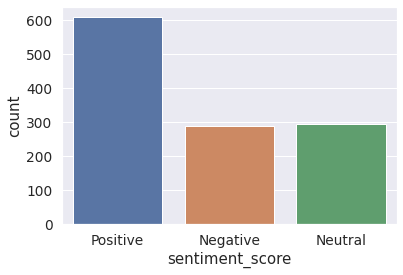

In [ ]:
sns.countplot(x='sentiment_score',data=df_train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Polarity values for the board_rating_reason feature ')

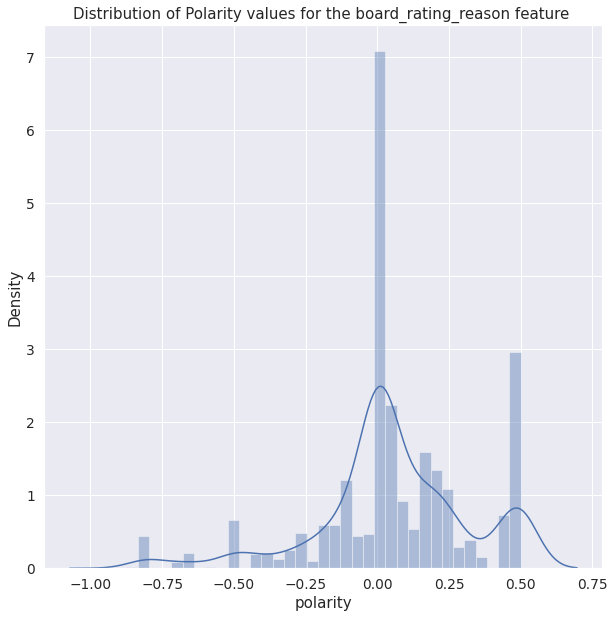

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df_train_data['polarity'])
plt.title('Distribution of Polarity values for the board_rating_reason feature ')

# Now its time to prepare the data for ML algorithm Training

In [ ]:
# Capture the label column data for the future 
data_labels = df_train_data['Category']
data_labels

0       9
1       9
2       9
3       9
4       9
       ..
1191    1
1192    1
1193    1
1194    1
1195    1
Name: Category, Length: 1196, dtype: int64

In [ ]:
sentiment_analysis(df_scoring_data,'board_rating_reason')
df_scoring_data[['polarity','sentiment_score']].head(5)

,polarity,sentiment_score
0,0.211111,Positive
1,0.150000,Positive
2,-0.300000,Negative
3,-0.300000,Negative
4,-0.066667,Negative


In [ ]:
df_train_data.columns

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category', 'polarity',
       'sentiment_score'],
      dtype='object')

In [ ]:
df_scoring_data.columns

Index(['id', 'name', 'display_name', 'production_budget', 'production_year',
       'movie_sequel', 'creative_type', 'source', 'production_method', 'genre',
       'language', 'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'polarity', 'sentiment_score'],
      dtype='object')

In [ ]:
model_train_data = df_train_data.drop(['id','name','display_name','production_year','board_rating_reason','total','Category','polarity'],axis=1)
len(df_train_data.columns),len(model_train_data.columns),model_train_data.columns

(17,
 9,
 Index(['movie_sequel', 'creative_type', 'source', 'production_method', 'genre',
        'language', 'movie_board_rating_display_name',
        'movie_release_pattern_display_name', 'sentiment_score'],
       dtype='object'))

In [ ]:
model_scoring_data = df_scoring_data.drop(['id','name','display_name','production_budget','production_year','board_rating_reason','polarity'],axis=1)
len(df_scoring_data.columns),len(model_scoring_data.columns),model_scoring_data.columns

(16,
 9,
 Index(['movie_sequel', 'creative_type', 'source', 'production_method', 'genre',
        'language', 'movie_board_rating_display_name',
        'movie_release_pattern_display_name', 'sentiment_score'],
       dtype='object'))

In [ ]:
model_train_data.head(2)

,movie_sequel,creative_type,source,production_method,genre,language,movie_board_rating_display_name,movie_release_pattern_display_name,sentiment_score
0,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,PG-13,Wide,Positive
1,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,PG-13,Wide,Negative


In [ ]:
model_scoring_data.head(2)

,movie_sequel,creative_type,source,production_method,genre,language,movie_board_rating_display_name,movie_release_pattern_display_name,sentiment_score
0,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,PG-13,Wide,Positive
1,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,PG-13,Wide,Positive


In [ ]:
model_train_data.shape,len(model_train_data),model_scoring_data.shape,len(model_scoring_data)

((1196, 9), 1196, (91, 9), 91)

In [ ]:
# This step is quite essential as there is a difference in the 
# sub-categories count for the category varaibales in training and scoring data

combined_test_score_data = pd.concat(objs=[model_train_data, model_scoring_data], axis=0)
combined_test_score_data.shape,len(combined_test_score_data)

((1287, 9), 1287)

I generally use either the pd.get_dummies / sklearn.compose.ColumnTransformer method for converting the categorical variables to numerical columns.

In this model, I would prefer to use the data generated from the pd.get_dummies for the model.
Use the pd.get_dummies method to convert the category columns into the numerical columns ( one-hot encoding)

I have intentionally avoided the movie_sequel column with the pd.get_dummies() to convert it into two different numerical columns  as one column itself sufficent to represent 0 or 1.
***This step was taken to avoid the multicollinearity issue***

In [ ]:
featured_combined_test_score_data = pd.get_dummies(combined_test_score_data,columns=['creative_type',
                                                                     'source','production_method', 'genre','language',
                                                                     'movie_board_rating_display_name','movie_release_pattern_display_name',
                                                                     'sentiment_score'])

In [ ]:
featured_combined_test_score_data.shape,len(featured_combined_test_score_data)

((1287, 78), 1287)

In [ ]:
# USE THIS FOR MODEL TRAINING AND TESTING 
# model_train_data_len -> 1196
model_train_data_len = len(model_train_data)
print(model_train_data_len)
featured_model_train_data = featured_combined_test_score_data[:model_train_data_len].copy()
featured_model_scoring_data = featured_combined_test_score_data[model_train_data_len:].copy()

1196


In [ ]:
# featured_model_train_data.columns
# featured_model_train_data.head(2)
featured_model_train_data.shape,len(featured_model_train_data)

((1196, 78), 1196)

In [ ]:
featured_model_scoring_data.shape,len(featured_model_scoring_data)

((91, 78), 91)

In [ ]:
featured_model_train_data.head(2)

,movie_sequel,creative_type_Contemporary Fiction,creative_type_Dramatization,creative_type_Factual,creative_type_Fantasy,creative_type_Historical Fiction,creative_type_Kids Fiction,creative_type_Multiple Creative Types,creative_type_Science Fiction,creative_type_Super Hero,source_Based on Comic/Graphic Novel,source_Based on Factual Book/Article,source_Based on Fiction Book/Short Story,source_Based on Folk Tale/Legend/Fairytale,source_Based on Game,source_Based on Musical or Opera,source_Based on Play,source_Based on Real Life Events,source_Based on Short Film,source_Based on TV,source_Based on Theme Park Ride,source_Based on Toy,source_Compilation,source_Original Screenplay,source_Remake,source_Spin-Off,production_method_Animation/Live Action,production_method_Digital Animation,production_method_Hand Animation,production_method_Live Action,production_method_Multiple Production Methods,production_method_Stop-Motion Animation,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Multiple Genres,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,language_Arabic,language_Danish,language_English,language_Farsi,language_French,language_German,language_Hebrew,language_Hindi,language_Indonesian/Balinese,language_Italian,language_Japanese,language_Norwegian,language_Polish,language_Portuguese,language_Silent,language_Spanish,language_Swedish,movie_board_rating_display_name_G,movie_board_rating_display_name_NC-17,movie_board_rating_display_name_Not Rated,movie_board_rating_display_name_PG,movie_board_rating_display_name_PG-13,movie_board_rating_display_name_R,movie_release_pattern_display_name_Exclusive,movie_release_pattern_display_name_Expands Wide,movie_release_pattern_display_name_IMAX,movie_release_pattern_display_name_Limited,movie_release_pattern_display_name_Oscar Qualifying Run,movie_release_pattern_display_name_Special Engagement,movie_release_pattern_display_name_Wide,sentiment_score_Negative,sentiment_score_Neutral,sentiment_score_Positive
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
featured_model_scoring_data.head(2)

,movie_sequel,creative_type_Contemporary Fiction,creative_type_Dramatization,creative_type_Factual,creative_type_Fantasy,creative_type_Historical Fiction,creative_type_Kids Fiction,creative_type_Multiple Creative Types,creative_type_Science Fiction,creative_type_Super Hero,source_Based on Comic/Graphic Novel,source_Based on Factual Book/Article,source_Based on Fiction Book/Short Story,source_Based on Folk Tale/Legend/Fairytale,source_Based on Game,source_Based on Musical or Opera,source_Based on Play,source_Based on Real Life Events,source_Based on Short Film,source_Based on TV,source_Based on Theme Park Ride,source_Based on Toy,source_Compilation,source_Original Screenplay,source_Remake,source_Spin-Off,production_method_Animation/Live Action,production_method_Digital Animation,production_method_Hand Animation,production_method_Live Action,production_method_Multiple Production Methods,production_method_Stop-Motion Animation,genre_Action,genre_Adventure,genre_Black Comedy,genre_Comedy,genre_Concert/Performance,genre_Documentary,genre_Drama,genre_Horror,genre_Multiple Genres,genre_Musical,genre_Romantic Comedy,genre_Thriller/Suspense,genre_Western,language_Arabic,language_Danish,language_English,language_Farsi,language_French,language_German,language_Hebrew,language_Hindi,language_Indonesian/Balinese,language_Italian,language_Japanese,language_Norwegian,language_Polish,language_Portuguese,language_Silent,language_Spanish,language_Swedish,movie_board_rating_display_name_G,movie_board_rating_display_name_NC-17,movie_board_rating_display_name_Not Rated,movie_board_rating_display_name_PG,movie_board_rating_display_name_PG-13,movie_board_rating_display_name_R,movie_release_pattern_display_name_Exclusive,movie_release_pattern_display_name_Expands Wide,movie_release_pattern_display_name_IMAX,movie_release_pattern_display_name_Limited,movie_release_pattern_display_name_Oscar Qualifying Run,movie_release_pattern_display_name_Special Engagement,movie_release_pattern_display_name_Wide,sentiment_score_Negative,sentiment_score_Neutral,sentiment_score_Positive
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


**Note that these are the additional columns that I have decided to drop after running the initial model with 78 columns once with the Random Forest Classifier.**
*(I would share this detail in the report document) *
RF classifier feature_importances_ are zero for these and these are not present in the scoring data either,so it is reasonable to drop these columns from the data used to train the models.
['language_Hebrew','language_Norwegian','language_Arabic','movie_release_pattern_display_name_Oscar Qualifying Run']


One of the advantages of the RF model is that it gives us the feature selection attribute feature_importances_ which indeed helps to reduce the dimentions of the data by removing features that are less important. 

Feature selection is one the major steps in the feature engineering process which indeed make the life much easier in ML world 

In [ ]:
# APPROACH - 2 TURN ON HERE 
# Based on Feature Selection with RF Classifer
# featured_model_train_data = featured_model_train_data.drop(['language_Hebrew','language_Norwegian',
#                                                             'language_Arabic','movie_release_pattern_display_name_Oscar Qualifying Run'],axis=1)

In [ ]:
# APPROACH - 3 TURN ON HERE
# Greedy based Approach
featured_model_train_data = featured_model_train_data.drop(['creative_type_Multiple Creative Types',
                                                            'source_Based on Musical or Opera',
                                                            'source_Based on Short Film',
                                                            'source_Based on Theme Park Ride','source_Based on Toy',
                                                            'source_Compilation','source_Spin-Off','production_method_Hand Animation',
                                                            'production_method_Multiple Production Methods',
                                                            'production_method_Stop-Motion Animation',
                                                            'genre_Black Comedy','genre_Multiple Genres',
                                                            'genre_Musical','genre_Western','language_Arabic',
                                                            'language_Danish', 'language_Farsi', 'language_German',
                                                            'language_Hebrew','language_Italian','language_Japanese',
                                                            'language_Norwegian', 'language_Polish','language_Portuguese',
                                                            'language_Silent','language_Swedish',
                                                            'movie_board_rating_display_name_NC-17',
                                                            'movie_release_pattern_display_name_Oscar Qualifying Run'],axis=1)

In [ ]:
# featured_model_train_data.columns
featured_model_train_data.shape

(1196, 50)

**Now the data looks less dimensional. **
***Reduction from 78 feature columns to 74 columns***

Achieved slight dimensionality reduction even before I thought and apply dimensionality reduction.

Interestingly, under Feature Engineering , we have feature selection and feature extraction. Random Forest algorithm help us with feature selection, where as dimensionality reduction is one of the appraoches for achieving the feature extraction.

I would think about dimensionality reduction approaches ( PCA / Kernel PCA / LDA further down the line. 



In [ ]:
# featured_model_train_data.head(2)

#Now its time select the model and train it 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Using the data generated with pd.get_dummies method
X_train,X_test,y_train,y_test = train_test_split(featured_model_train_data,data_labels,test_size= 0.30,random_state=101)

I generally apply the feature-scaling ( standardization)  before staring the model training.Since our dataset is having only 0 and 1 values, I am going avoid it this time. So following part of the code is commented

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#The approach that I followed for ML model training and fine tuning

The core thought process that I follow in ML is:

- ML model building is an iterative process ->build, test and fine-tune ... Time and patience is required .

- First model that you build might not be the best.

- Some ML practitioners may have their personal favorite ML algorithms to build models, but generally I would prefer to build and try with all the possible options because firstly, you have a chance to compare the performances across multiple models, secondly all the models that you build can be sourced to a Voting Classifer, then check the results !!

- Indeed, I have exactly followed the above mentioned appraoch below. I have tried following models (in the order, starting with the one I like the most ) 

- XGBoost ( *Often displays the power of boosting ensemble method* ) 
- Random Forest ( *Wisdom of the crowd..I like it this algorithm very much*)
- Decision Tree
- SVM (OVR method) --  (logistic regression and SVM are considered to be binary classification algorithms, but SVM can support multi-class classification with OVR / OVO methods)
- KNN
- Navie Bayes

- Finally, Voting Classifier ( bagging ensemble method) to leverage the results from all the above models.I have used the soft voting as all the above classifiers support predict_proba method.

**I have attempted to fine-tune the models during the training itself by using the RandomisedGridSearchCV method. I preferred it over normal GridSearchCV, due to the its randomness in searching the high dimensional hyper-parameter space.I personally feel that the method of GridSearchCV is restricted to a small search space.**

Note:
I consider Neural network models(Deep Learning method) as an another category from the above models.Considering the dimenationalty of the problem, the amount of data avilable is quite less for a neural network give a good performance- its my personal intuition. 



**XGBoost Model**

In [ ]:
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_predictions = XGB_classifier.predict(X_test)
cMatrix = confusion_matrix(y_test,y_predictions)
model_accuracy_score = XGB_classifier.score(X_test,y_test)
print("\n Accuracy Score is: {:.2f}\n".format(model_accuracy_score))
print(classification_report(y_test,y_predictions))


 Accuracy Score is: 0.26

              precision    recall  f1-score   support

           1       0.31      0.45      0.37        49
           2       0.34      0.27      0.30        77
           3       0.25      0.37      0.30        63
           4       0.21      0.24      0.22        59
           5       0.14      0.07      0.10        40
           6       0.11      0.04      0.05        28
           7       0.17      0.15      0.16        20
           8       0.17      0.13      0.15        15
           9       0.71      0.62      0.67         8

    accuracy                           0.26       359
   macro avg       0.27      0.26      0.26       359
weighted avg       0.25      0.26      0.25       359



Helper function to print confusion matrix

In [ ]:
def confusion_matrix_plot(cMatrix):    
  ax = sns.heatmap(cMatrix, annot=True, cmap='coolwarm',linewidths=1)
  ax.set_title('Confusion Matrix\n\n');
  ax.set_xlabel('\nPredicted Movie Category')
  ax.set_ylabel('Actual Movie Category ');
  ## Ticket labels 
  ax.xaxis.set_ticklabels(['1','2','3','4','5','6','7','8','9'])
  ax.yaxis.set_ticklabels(['1','2','3','4','5','6','7','8','9'])

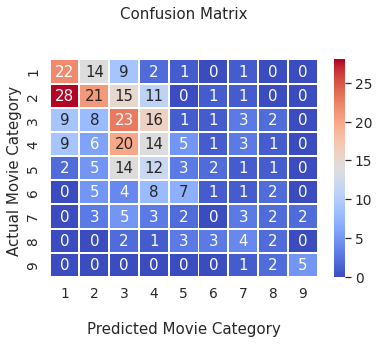

In [ ]:
confusion_matrix_plot(cMatrix)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_metric = cross_val_score(estimator=XGB_classifier,X=X_train,y=y_train,cv=10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))

Cross Validation Accuracy: 0.29 (+/- 0.08)


In [ ]:
from pprint import pprint
# parameters of  XGBoost classifier
print('Parameters currently in use:\n')
pprint(XGB_classifier.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


**RandomForestClassifier**

As it is one of my favorite models, I have spent quite a good amount of time on it to analyze further 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# # I HAVE COMMNETED THIS SOURCE AS I ALREADY USED THESE PARAMETERS IN LAST RUN 

# # Hyper parameter value search space for RandomForestClassifier

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
               
# pprint(random_grid)

In [ ]:
# #  Use the random grid to search for best hyperparameters
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# RF_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
#                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# RF_random.fit(X_train, y_train)
# RF_random.best_params_, RF_random.best_estimator_

In [ ]:
# Below are the parameters returned by the grid search from multple trials

# Fitting 3 folds for each of 100 candidates, totalling 300 fits

# {'bootstrap': False,
#  'max_depth': 20,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 4,
#  'min_samples_split': 10,
#  'n_estimators': 1200}


# Fitting 3 folds for each of 100 candidates, totalling 300 fits

# {'bootstrap': False,
#  'max_depth': 9,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 673}

# Fitting 10 folds for each of 100 candidates, totalling 1000 fits - 0.30

# ({'bootstrap': True,
#   'max_depth': 9,
#   'max_features': 'auto',
#   'min_samples_leaf': 1,
#   'min_samples_split': 15,
#   'n_estimators': 200},
#  RandomForestClassifier(max_depth=9, min_samples_split=15, n_estimators=200))

# Fitting 10 folds for each of 100 candidates, totalling 1000 fits

# ({'bootstrap': True,
#   'max_depth': None,
#   'max_features': 'auto',
#   'min_samples_leaf': 6,
#   'min_samples_split': 10,
#   'n_estimators': 293},
#  RandomForestClassifier(min_samples_leaf=6, min_samples_split=10,
#                         n_estimators=293))


# Create the model with above hyper parameter values

from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators=200, max_depth=9,
                                       bootstrap=True,max_features='auto',min_samples_leaf=1,
                                       min_samples_split=15)
RF_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=15, n_estimators=200)


 Accuracy Score is: 0.26



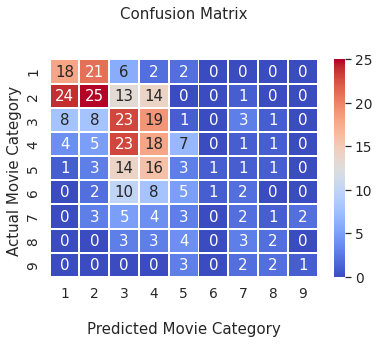

In [ ]:
y_predictions = RF_classifier.predict(X_test)
cMatrix = confusion_matrix(y_test,y_predictions)
model_accuracy_score = RF_classifier.score(X_test,y_test)
print("\n Accuracy Score is: {:.2f}\n".format(model_accuracy_score))
confusion_matrix_plot(cMatrix)

In [ ]:
accuracy_metric = cross_val_score(estimator=RF_classifier,X=X_train,y=y_train,cv=10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))

Cross Validation Accuracy: 0.30 (+/- 0.07)


**Feature Selection with RF Model.**

As mentioned earlier, I used the result from the first test run to eleminate some of features those were having 0 value for the feature_importances_ attribute to reduce the dimensionality of the dataset

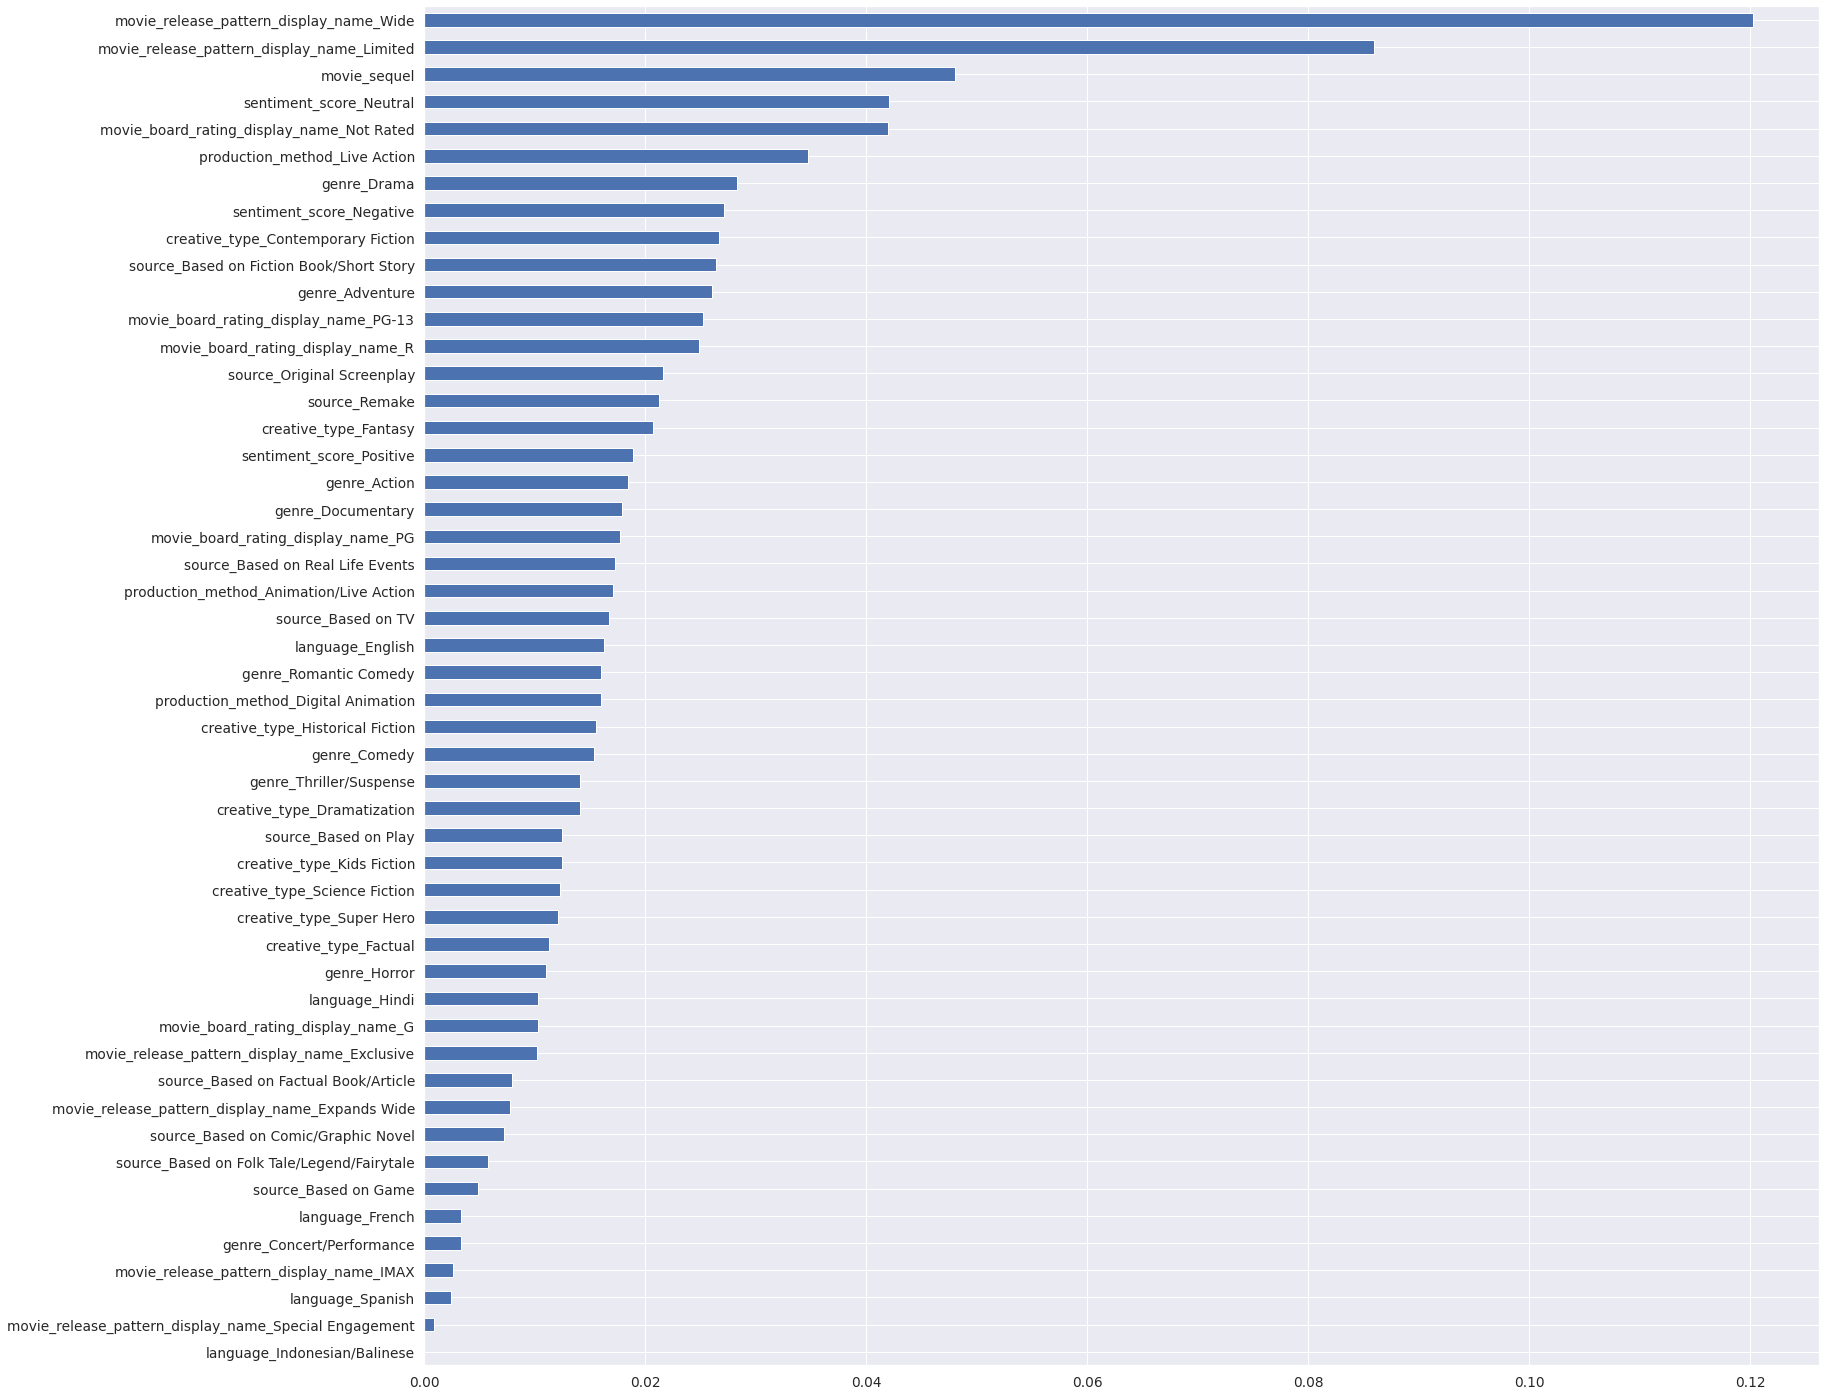

In [ ]:
RF_feature_imp_data = pd.Series(data = RF_classifier.feature_importances_,
                             index = featured_model_train_data.columns)

plt.figure(figsize=(25,25))
RF_feature_imp_data.sort_values(ascending=True)[:].plot(kind='barh')

Numerical values for the feature_importances_

In [ ]:
RF_feature_imp_data

movie_sequel                                             0.047991
creative_type_Contemporary Fiction                       0.026637
creative_type_Dramatization                              0.014055
creative_type_Factual                                    0.011236
creative_type_Fantasy                                    0.020704
creative_type_Historical Fiction                         0.015551
creative_type_Kids Fiction                               0.012405
creative_type_Science Fiction                            0.012238
creative_type_Super Hero                                 0.012070
source_Based on Comic/Graphic Novel                      0.007233
source_Based on Factual Book/Article                     0.007885
source_Based on Fiction Book/Short Story                 0.026407
source_Based on Folk Tale/Legend/Fairytale               0.005710
source_Based on Game                                     0.004881
source_Based on Play                                     0.012468
source_Bas

Helper function to plot the learning curve

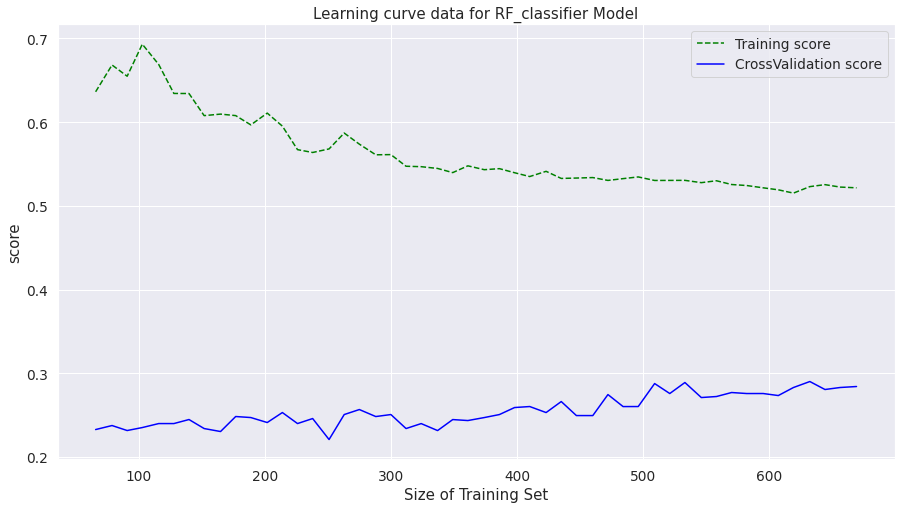

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RF_classifier, 
                                                        X_train, 
                                                        y_train,
                                                        cv = 5,                                                      
                                                        scoring='accuracy',
                                                        return_times=False,                                                       
                                                        train_sizes=np.linspace(0.1,1.0,50))

def model_learning_curve_plot(train_scores,test_scores):

  trainSet_score_mean = np.mean(train_scores,axis=1)
  testSet_score_mean = np.mean(test_scores, axis=1)
  plt.figure(figsize=(15,8))
  plt.plot(train_sizes, trainSet_score_mean, '--', color="green",label="Training score")
  plt.plot(train_sizes, testSet_score_mean, color="blue",label="CrossValidation score")
  plt.title('Learning curve data for RF_classifier Model')
  plt.xlabel('Size of Training Set')
  plt.ylabel('score')
  plt.legend()

model_learning_curve_plot(train_scores,test_scores)

**DecisionTreeClassifier**

In [ ]:
# # I HAVE COMMNETED THIS SOURCE AS I ALREADY USED THESE PARAMETERS IN LAST RUN 

# # Hyper parameter value search space for DecisionTreeClassifier

# # The number of features to consider when looking for the best split
# max_features = ['auto', 'sqrt','log2']
# # Function to measure the quality of a split.
# criterion = ['gini', 'entropy']
# # The strategy used to choose the split at each node
# splitter = ['best', 'random']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# random_grid = {'max_features': max_features,
#                'max_depth': max_depth,
#                'splitter' : splitter,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'criterion': criterion}
               
# pprint(random_grid)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# I HAVE COMMNETED THIS SOURCE AS I ALREADY GOT THE PARAMETERS IN LAST RUN 
#  Use the random grid to search for best hyperparameters

# classifier = DecisionTreeClassifier()
# DT_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
#                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# DT_random.fit(X_train, y_train)
# DT_random.best_params_,DT_random.best_estimator_


 Accuracy Score is: 0.25



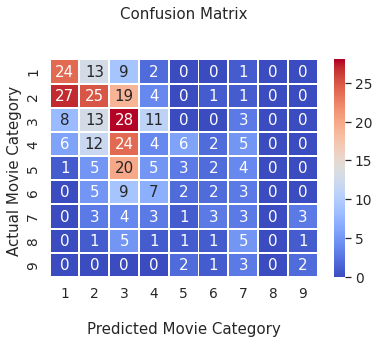

In [ ]:
# Create the DT_classifier with the parameters returned by grid search
DT_classifier = DecisionTreeClassifier(criterion='gini', max_depth=50,
                                       splitter='random',max_features='log2',min_samples_leaf=4,
                                       min_samples_split=2)
DT_classifier.fit(X_train,y_train)
y_predictions = DT_classifier.predict(X_test)
cMatrix = confusion_matrix(y_test,y_predictions)
model_accuracy_score = DT_classifier.score(X_test,y_test)
print("\n Accuracy Score is: {:.2f}\n".format(model_accuracy_score))
confusion_matrix_plot(cMatrix)

In [ ]:
accuracy_metric = cross_val_score(estimator=DT_classifier,X=X_train,y=y_train,cv=10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))

Cross Validation Accuracy: 0.26 (+/- 0.10)


**KNeighborsClassifier**

Finding the optimal value for K upfront with elbow technique

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Calculate the optimal K-value by elbow method
error = []
for k in range(1,30):
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    error.append(np.mean(predict!=y_test))

print(error)

[0.7827298050139275, 0.8161559888579387, 0.8105849582172702, 0.7715877437325905, 0.754874651810585, 0.7604456824512534, 0.766016713091922, 0.7715877437325905, 0.766016713091922, 0.7576601671309192, 0.754874651810585, 0.7493036211699164, 0.7465181058495822, 0.7325905292479109, 0.724233983286908, 0.7465181058495822, 0.7381615598885793, 0.7325905292479109, 0.7381615598885793, 0.7270194986072424, 0.724233983286908, 0.7298050139275766, 0.7604456824512534, 0.766016713091922, 0.7520891364902507, 0.766016713091922, 0.7576601671309192, 0.7743732590529248, 0.766016713091922]


Text(0.5, 1.0, 'Error Rate vs K-Value')

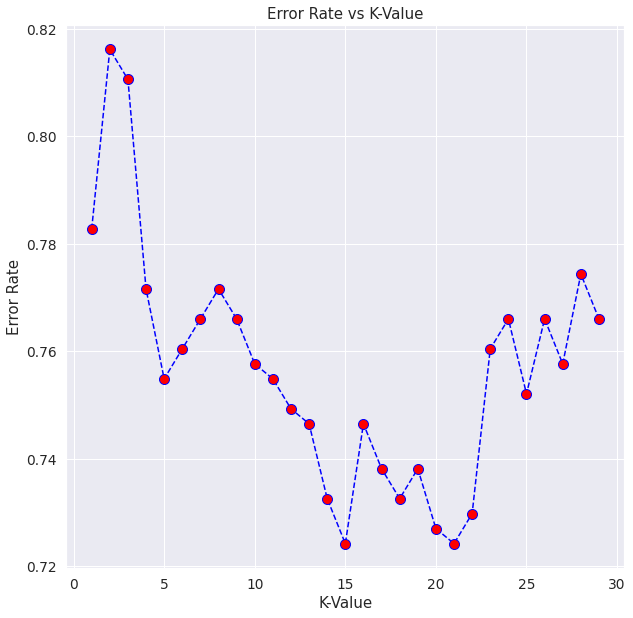

In [ ]:
plt.figure(figsize=(10,10))
kval = np.arange(1,30)
plt.plot(kval,error,c='blue',ls='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-Value')


 Accuracy Score is: 0.23



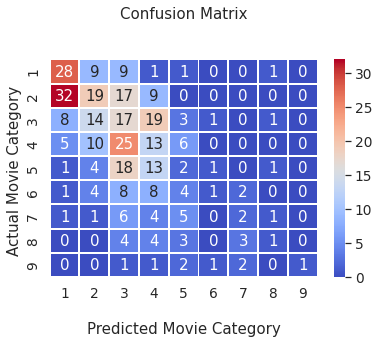

In [ ]:
# For baseline 
KNN_classifier = KNeighborsClassifier(n_neighbors=24)
# For Feature Selection
# KNN_classifier = KNeighborsClassifier(n_neighbors=24)
# For Greedy Approach
# KNN_classifier = KNeighborsClassifier(n_neighbors=15)
KNN_classifier.fit(X_train,y_train)
y_predictions = KNN_classifier.predict(X_test)
cMatrix = confusion_matrix(y_test,y_predictions)
model_accuracy_score = KNN_classifier.score(X_test,y_test)
print("\n Accuracy Score is: {:.2f}\n".format(model_accuracy_score))
confusion_matrix_plot(cMatrix)

In [ ]:
accuracy_metric = cross_val_score(estimator=KNN_classifier,X=X_train,y=y_train,cv=10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))

Cross Validation Accuracy: 0.26 (+/- 0.08)


**Support Vector Machine Classifier**

In [ ]:
#  Use the random grid to search for best hyperparameters

from sklearn.svm import SVC

# Regularization parameter
C = [0.1,1,10,100,1000]
# Kernel coefficient  
gamma = [1,0.1,0.01,0.001,0.0001]
# The kernel type to be used in the algorithm
kernel = ['poly', 'rbf']
# decision_function_shape -  one-vs-rest (‘ovr’) or  one-vs-one (‘ovo’) 
decision_function_shape = ['ovo', 'ovr']

random_grid = {'C': C,
               'gamma': gamma,
               'kernel' : kernel,
               'decision_function_shape':decision_function_shape}
               
classifier = SVC()
SVC_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                               n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
SVC_random.fit(X_train, y_train)
SVC_random.best_params_,SVC_random.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


({'C': 10, 'decision_function_shape': 'ovr', 'gamma': 0.1, 'kernel': 'rbf'},
 SVC(C=10, gamma=0.1))


 Accuracy Score is: 0.25



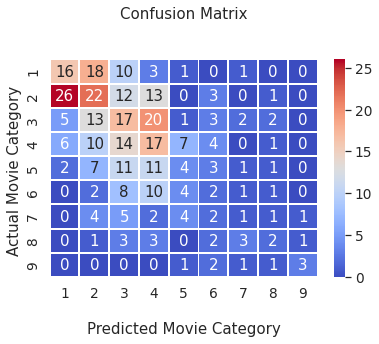

In [ ]:
# creating the model with the optimal parameters from gridsearch
SVC_classifier = SVC(C=1000,gamma=0.001,kernel='rbf',decision_function_shape='ovo',probability=True)
SVC_classifier.fit(X_train,y_train)
y_predictions=  SVC_random.predict(X_test)
cMatrix = confusion_matrix(y_test,y_predictions)
model_accuracy_score = SVC_classifier.score(X_test,y_test)
print("\n Accuracy Score is: {:.2f}\n".format(model_accuracy_score))
confusion_matrix_plot(cMatrix)

In [ ]:
accuracy_metric = cross_val_score(estimator=SVC_classifier,X=X_train,y=y_train,cv=10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))

Cross Validation Accuracy: 0.28 (+/- 0.07)


**NaiveBayes Classifier**


 Accuracy Score is: 0.15



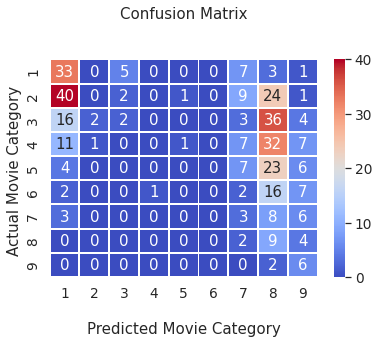

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train,y_train)
y_predictions = NB_classifier.predict(X_test)
cMatrix = confusion_matrix(y_test,y_predictions)
model_accuracy_score = NB_classifier.score(X_test,y_test)
print("\n Accuracy Score is: {:.2f}\n".format(model_accuracy_score))
confusion_matrix_plot(cMatrix)

In [ ]:
accuracy_metric = cross_val_score(estimator=NB_classifier,X=X_train,y=y_train,cv=10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))

Cross Validation Accuracy: 0.14 (+/- 0.04)


In [ ]:
# parameters of  Naive Bayes classifier
print('Parameters currently in use:\n')
pprint(NB_classifier.get_params())

Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}


**Voting Classifer ( soft voting) - Ensemble method to leverage the results from the all the above classifer**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_classifier = VotingClassifier(estimators=[('XGB',XGB_classifier),('RF',RF_classifier),
                                                 ('DT',DT_classifier),('SVM',SVC_classifier),
                                                 ('KNN',KNN_classifier),('NB',NB_classifier)],
                                     voting='soft')


 Accuracy Score is: 0.26

Cross Validation Accuracy: 0.28 (+/- 0.10)



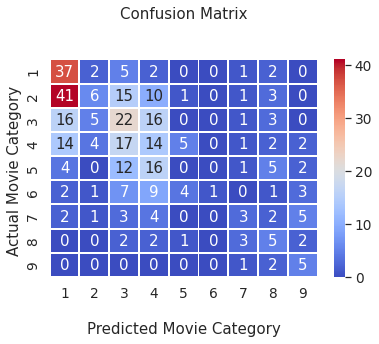

In [ ]:
voting_classifier.fit(X_train,y_train)
y_predictions = voting_classifier.predict(X_test)
cMatrix = confusion_matrix(y_test,y_predictions)
model_accuracy_score = voting_classifier.score(X_test,y_test)
print("\n Accuracy Score is: {:.2f}\n".format(model_accuracy_score))
accuracy_metric = cross_val_score(estimator=voting_classifier,X=X_train,y=y_train,cv=10)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)\n" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))
confusion_matrix_plot(cMatrix)

Summary

In [ ]:
for clf in (XGB_classifier,RF_classifier,DT_classifier,SVC_classifier,KNN_classifier,
            NB_classifier,voting_classifier):
  
  accuracy_metric = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
  print(clf.__class__.__name__)

  print("\n Accuracy Score is: {:.2f}\n".format(clf.score(X_test,y_test)))
  print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy_metric.mean(),
                                                        accuracy_metric.std() * 2))
  print('\n --------------------------\n')

XGBClassifier

 Accuracy Score is: 0.26

Cross Validation Accuracy: 0.29 (+/- 0.08)

 --------------------------

RandomForestClassifier

 Accuracy Score is: 0.26

Cross Validation Accuracy: 0.30 (+/- 0.06)

 --------------------------

DecisionTreeClassifier

 Accuracy Score is: 0.25

Cross Validation Accuracy: 0.27 (+/- 0.10)

 --------------------------

SVC

 Accuracy Score is: 0.25

Cross Validation Accuracy: 0.28 (+/- 0.07)

 --------------------------

KNeighborsClassifier

 Accuracy Score is: 0.23

Cross Validation Accuracy: 0.26 (+/- 0.08)

 --------------------------

GaussianNB

 Accuracy Score is: 0.15

Cross Validation Accuracy: 0.14 (+/- 0.04)

 --------------------------

VotingClassifier

 Accuracy Score is: 0.26

Cross Validation Accuracy: 0.28 (+/- 0.09)

 --------------------------

